<a href="https://colab.research.google.com/github/naresh-github-2005/Qiskit_multi_qubit_gates/blob/main/Qiskit_multi_qubit_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00


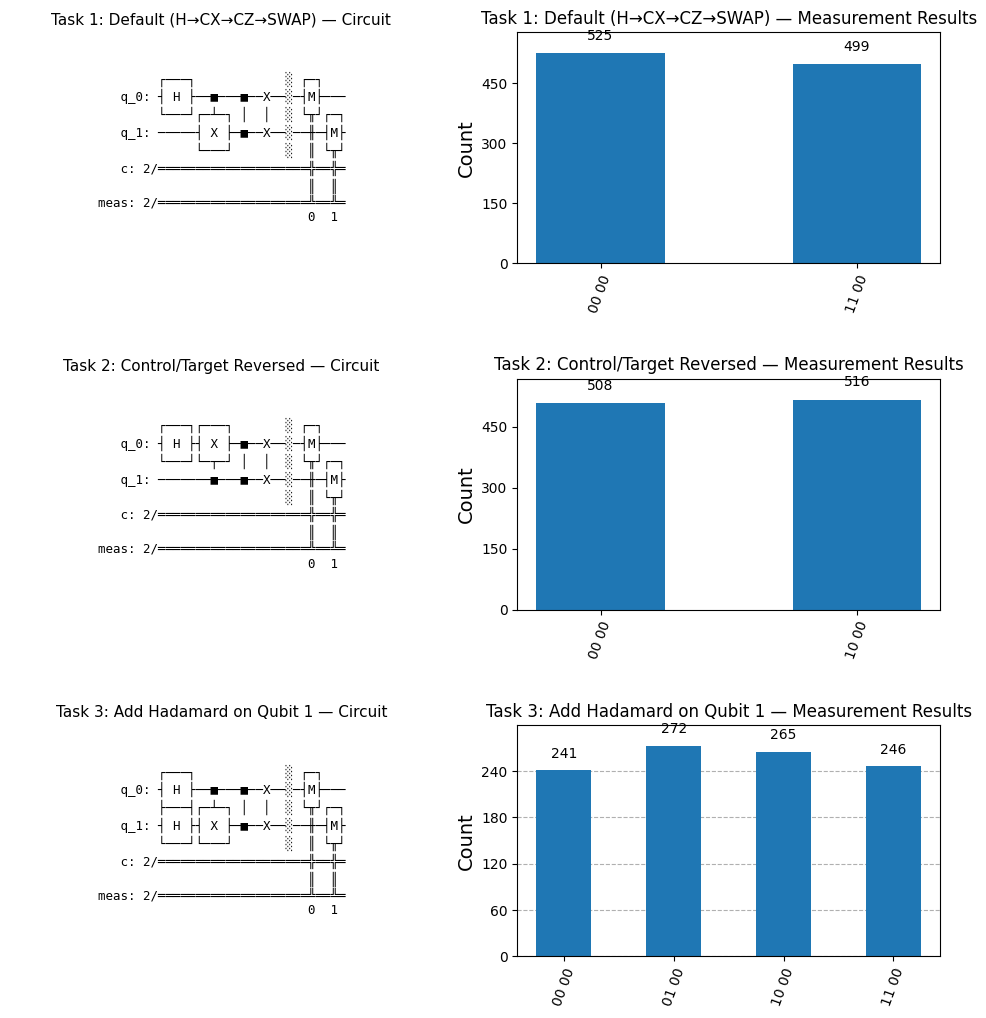

In [2]:
# =========================================================
# ⚛ Multi-Qubit Gate Operations — Comparative Visualization
# =========================================================

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# =========================================================
# 🧩 Setup
# =========================================================
sim = AerSimulator()

def run_experiment(title, gate_sequence):
    """
    Runs a 2-qubit quantum experiment with a given gate sequence.
    Returns measurement counts and statevector.
    """
    qc = QuantumCircuit(2, 2)
    gate_sequence(qc)
    qc.measure_all()

    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # Statevector before measurement
    qc_no_measure = QuantumCircuit(2)
    gate_sequence(qc_no_measure)
    state = Statevector.from_instruction(qc_no_measure)

    return qc, counts, state, title


# =========================================================
# 🧪 Task 1: Default Circuit (H → CX → CZ → SWAP)
# =========================================================
def circuit_task1(qc):
    qc.h(0)
    qc.cx(0, 1)
    qc.cz(0, 1)
    qc.swap(0, 1)


# =========================================================
# 🧪 Task 2: Control/Target Variation (CX(1,0), CZ(1,0))
# =========================================================
def circuit_task2(qc):
    qc.h(0)
    qc.cx(1, 0)  # reversed control/target
    qc.cz(1, 0)
    qc.swap(0, 1)


# =========================================================
# 🧪 Task 3: Add Hadamard on Qubit 1 before CX
# =========================================================
def circuit_task3(qc):
    qc.h(0)
    qc.h(1)      # extra Hadamard
    qc.cx(0, 1)
    qc.cz(0, 1)
    qc.swap(0, 1)


# =========================================================
# ⚙ Run All Tasks
# =========================================================
experiments = [
    run_experiment("Task 1: Default (H→CX→CZ→SWAP)", circuit_task1),
    run_experiment("Task 2: Control/Target Reversed", circuit_task2),
    run_experiment("Task 3: Add Hadamard on Qubit 1", circuit_task3)
]

# =========================================================
# 🧭 Visualization — Circuits + Histograms
# =========================================================
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for i, (qc, counts, state, title) in enumerate(experiments):
    # Circuit diagram
    axs[i, 0].axis('off')
    axs[i, 0].text(0.5, 0.5, qc.draw(output='text'), fontsize=9, family='monospace',
                   va='center', ha='center')
    axs[i, 0].set_title(f"{title} — Circuit", fontsize=11)

    # Histogram
    plot_histogram(counts, ax=axs[i, 1])
    axs[i, 1].set_title(f"{title} — Measurement Results")

plt.show()